### Cross-Validation

* In machine learning, we couldn’t fit the model on the training data and can’t say that the model will work accurately for the real data. For this, we must assure that our model got the correct patterns from the data, and it is not getting up too much noise. For this purpose, we use the cross-validation technique.

### Methods of Cross Validation

* LOOCV (Leave One Out Cross Validation) 

In this method, we perform training on the whole data-set but leaves only one data-point of the available data-set and then iterates for each data-point. It has some advantages as well as disadvantages also.
An advantage of using this method is that we make use of all data points and hence it is low bias.
The major drawback of this method is that it leads to higher variation in the testing model as we are testing against one data point. If the data point is an outlier it can lead to higher variation. Another drawback is it takes a lot of execution time as it iterates over ‘the number of data points’ times.


* K-Fold Cross Validation

In this method, we split the data-set into k number of subsets(known as folds) then we perform training on the all the subsets but leave one(k-1) subset for the evaluation of the trained model. In this method, we iterate k times with a different subset reserved for testing purpose each time.

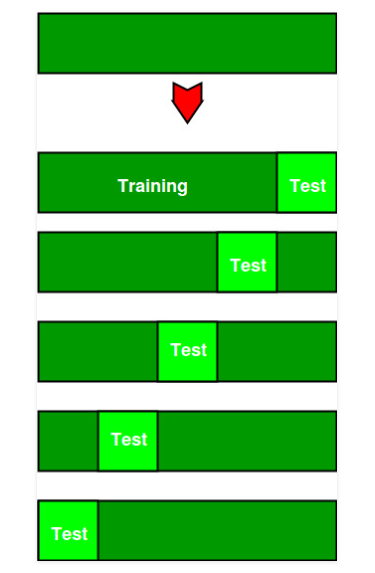

In [11]:
from IPython.display import Image
Image(filename=r'Images\K fold cross validation.png', width=220)

The general procedure is as follows:

* Shuffle the dataset randomly.
* Split the dataset into k groups
* For each unique group:
    * Take the group as a hold out or test data set
    * Take the remaining groups as a training data set
    * Fit a model on the training set and evaluate it on the test set
    * Retain the evaluation score and discard the model
* Summarize the skill of the model using the sample of model evaluation scores

### Simple Example

In [13]:
# scikit-learn k-fold cross-validation
from numpy import array
from sklearn.model_selection import KFold
# data sample
data = array([1, 2, 3, 4, 5, 6]);data

array([1, 2, 3, 4, 5, 6])

In [14]:
# prepare cross validation
kfold = KFold(3, True, 1);kfold

KFold(n_splits=3, random_state=1, shuffle=True)

In [15]:
# enumerate splits
for train, test in kfold.split(data):
    print('train: %s, test: %s' % (data[train], data[test]))

train: [1 4 5 6], test: [2 3]
train: [2 3 4 6], test: [1 5]
train: [1 2 3 5], test: [4 6]


### Comparison of test/train and K-fold

* Advantages of test/train split:
    * Runs k-times faster than k-fold,
    * Simpler than k-fold so it would be easier to analyze the testing errors

* Advantages of cross-validation:
    * It is more better estimator of out-of-sample accuracy,
    * More efficient use of data since each data is used for train and testing

https://dziganto.github.io/cross-validation/data%20science/machine%20learning/model%20tuning/python/Model-Tuning-with-Validation-and-Cross-Validation/

http://scikit-learn.org/stable/modules/cross_validation.html

https://stackoverflow.com/questions/49134338/kfolds-cross-validation-vs-train-test-split

https://bigdata-madesimple.com/how-to-run-linear-regression-in-python-scikit-learn/

In [1]:
from sklearn import datasets
boston = datasets.load_boston()
data = boston.data
target = boston.target

In [2]:
data[:1]

array([[6.320e-03, 1.800e+01, 2.310e+00, 0.000e+00, 5.380e-01, 6.575e+00,
        6.520e+01, 4.090e+00, 1.000e+00, 2.960e+02, 1.530e+01, 3.969e+02,
        4.980e+00]])

In [3]:
target[:1]

array([24.])

In [42]:
data.shape

(506, 13)

In [43]:
target.shape

(506,)

In [5]:
boston.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])

In [6]:
boston.feature_names

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype='<U7')

In [8]:
print(boston.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [74]:
import pandas as pd
boston1= pd.DataFrame(boston.data)

In [76]:
boston1.head(3)

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03


In [77]:
boston1.columns= boston.feature_names

In [78]:
boston1.head(3)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03


In [79]:
boston1['Price'] = boston.target

In [80]:
boston1.head(3)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Price
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7


In [81]:
X = boston1.drop('Price',axis=1);X.head(3)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03


In [84]:
y = boston1.Price;print(y[:3])

0    24.0
1    21.6
2    34.7
Name: Price, dtype: float64


### Full Model

In [101]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression(fit_intercept=True,copy_X=True,normalize=False)

In [102]:
full_model = lr.fit(X,y)

print('Estimated intercept coefficient:',lr.intercept_)
print('Number of coefficients:',len(lr.coef_))

pd.DataFrame(list(zip(X.columns,lr.coef_)),columns=['features','estimatedCoefficients'])

Estimated intercept coefficient: 36.45948838509015
Number of coefficients: 13


,features,estimatedCoefficients
0,CRIM,-0.108011
1,ZN,0.046420
2,INDUS,0.020559
3,CHAS,2.686734
4,NOX,-17.766611
5,RM,3.809865
6,AGE,0.000692
7,DIS,-1.475567
8,RAD,0.306049
9,TAX,-0.012335


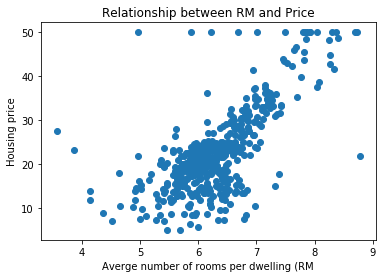

In [103]:
import matplotlib.pyplot as plt
plt.scatter(boston1.RM, boston1.Price)
plt.xlabel("Averge number of rooms per dwelling (RM")
plt.ylabel("Housing price")
plt.title("Relationship between RM and Price")
plt.show()

In [104]:
lr.predict(X)[0:5]

array([30.00384338, 25.02556238, 30.56759672, 28.60703649, 27.94352423])

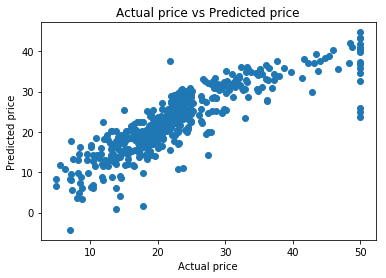

In [105]:
plt.scatter(boston1.Price, lr.predict(X))
plt.xlabel("Actual price")
plt.ylabel("Predicted price")
plt.title("Actual price vs Predicted price")
plt.show()

In [106]:
msefull = np.mean((boston1.Price - lr.predict(X)) ** 2)
print (msefull)

21.89483118172922


In [ ]:
def calc_train_error(X_train,y_train,model):
    """returns in-sample error for already fit model"""
    predictions = model.predict(X_train)
    mse = mean_squared_error(y_train,predictions)
    rmse = np.sqrt(mse)
    return rmse

In [166]:
full_model_error = round(calc_train_error(X_train,y_train,lr),3);
full_model_error

4.677

In [167]:
print('Full Model ERROR')
print('-' * 40)
print('Full Model Error: {}'.format(full_model_error))

Full Model ERROR
----------------------------------------
Full Model Error: 4.677


### Train Test split

In [168]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=15,shuffle=True)
# X_train,X_test,y_train,y_test = train_test_split(data,target,test_size=0.2,random_state=15,shuffle=True)

In [169]:
print("X_train details are :",X_train.shape)
print("X_train details are :",X_test.shape)
print("X_train details are :",y_train.shape)
print("X_train details are :",y_test.shape)

X_train details are : (404, 13)
X_train details are : (102, 13)
X_train details are : (404,)
X_train details are : (102,)


In [170]:
from sklearn.metrics import mean_squared_error
import numpy as np

def calc_train_error(X_train,y_train,model):
    """returns in-sample error for already fit model"""
    predictions = model.predict(X_train)
    mse = mean_squared_error(y_train,predictions)
    rmse = np.sqrt(mse)
    return rmse

def calc_validation_error(X_test,y_test,model):
    """returns out-of-sample error for already fit model"""
    predictions = model.predict(X_test)
    mse = mean_squared_error(y_test,predictions)
    rmse = np.sqrt(mse)
    return rmse
    
def calc_metrics(X_train,y_train,X_test,y_test,model):
    """fits model and returns rmse for in-sample error and out-of-sample error"""
    model.fit(X_train,y_train)
    train_error = calc_train_error(X_train,y_train,model)
    validation_error = calc_validation_error(X_test,y_test,model)
    return train_error, validation_error   

In [171]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression(fit_intercept=True,copy_X=True,normalize=False)

In [172]:
train_test_model = lr.fit(X_train,y_train)

print('Estimated intercept coefficient:',train_test_model.intercept_)
print('Number of coefficients:',len(train_test_model.coef_))

pd.DataFrame(list(zip(X_train.columns,train_test_model.coef_)),columns=['features','estimatedCoefficients'])

Estimated intercept coefficient: 39.90557145395924
Number of coefficients: 13


,features,estimatedCoefficients
0,CRIM,-0.109995
1,ZN,0.054860
2,INDUS,0.056820
3,CHAS,3.702286
4,NOX,-20.689007
5,RM,3.440591
6,AGE,0.004409
7,DIS,-1.698040
8,RAD,0.343836
9,TAX,-0.012527


In [174]:
train_error, test_error = calc_metrics(X_train,y_train,X_test,y_test,lr)
train_error, test_error = round(train_error, 3), round(test_error, 3)

In [175]:
print ("Fit a model X_train, and calculate MSE with Y_train:", np.mean((y_train - lr.predict(X_train)) ** 2))
print ("Fit a model X_test, and calculate MSE with Y_test:", np.mean((y_test - lr.predict(X_test)) ** 2))

Fit a model X_train, and calculate MSE with Y_train: 21.871593283838443
Fit a model X_test, and calculate MSE with Y_test: 23.812245465080828


In [176]:
print('Full Model ERROR')
print('-' * 40)
print('Full Model Error: {}\n'.format(full_model_error))
print('Train Test Model Error')
print('-' * 40)
print('train error: {} | test error: {}'.format(train_error, test_error))

Full Model ERROR
----------------------------------------
Full Model Error: 4.677

Train Test Model Error
----------------------------------------
train error: 4.677 | test error: 4.88


### Train Validation Test split

In [185]:
# intermediate/test split (gives us test set)

X_intermediate,X_test,y_intermediate,y_test = train_test_split(X,y,test_size=0.2,shuffle=True,random_state=15)

print("X_intermediate details are :",X_intermediate.shape)
print("X_test details are         :",X_test.shape)
print("y_intermediate details are :",y_intermediate.shape)
print("y_test details are         :",y_test.shape)

X_intermediate details are : (404, 13)
X_test details are         : (102, 13)
y_intermediate details are : (404,)
y_test details are         : (102,)


In [186]:
# train/validation split (gives us train and validation datasets)

X_train,X_validation,y_train,y_validation = train_test_split(X_intermediate,y_intermediate,test_size=0.25,shuffle=True,
                                                             random_state=15)

print("X_train details are      :",X_train.shape)
print("X_validation details are :",X_validation.shape)
print("y_train details are      :",y_train.shape)
print("y_validation details are :",y_validation.shape)

X_train details are      : (303, 13)
X_validation details are : (101, 13)
y_train details are      : (303,)
y_validation details are : (101,)


In [187]:
del X_intermediate,y_intermediate

In [188]:
# print proportions

print('train: {} | validation: {} | test: {}'
      .format(round(len(y_train)/len(y),2),
             round(len(y_validation)/len(y),2),
             round(len(y_test)/len(y),2)))


train: 0.6 | validation: 0.2 | test: 0.2


### Model Tuning

In [189]:
from sklearn.linear_model import Ridge
alphas = [0.001,0.01,0.1,1,10]
print('All errors are RMSE')
print('-'*100)
for alpha in alphas:
    # instantiate and fit model
    ridge = Ridge(alpha=alpha,fit_intercept=True,random_state=15)
    ridge.fit(X_train,y_train)
    # calculate errors
    new_train_error = mean_squared_error(y_train, ridge.predict(X_train))
    new_validation_error = mean_squared_error(y_validation, ridge.predict(X_validation))
    new_test_error = mean_squared_error(y_test,ridge.predict(X_test))

    print('alpha: {:7} | train_error: {:5} | validation_error: {:6} | test_error: {}'.
          format(alpha,round(new_train_error,3),round(new_validation_error,3),round(new_test_error,3)))


All errors are RMSE
----------------------------------------------------------------------------------------------------
alpha:   0.001 | train_error: 23.31 | validation_error: 18.743 | test_error: 25.347
alpha:    0.01 | train_error: 23.31 | validation_error: 18.741 | test_error: 25.33
alpha:     0.1 | train_error: 23.323 | validation_error: 18.731 | test_error: 25.185
alpha:       1 | train_error: 23.683 | validation_error: 18.979 | test_error: 24.713
alpha:      10 | train_error: 24.632 | validation_error: 20.108 | test_error: 24.284


In [190]:
# train/test split
X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y, 
                                                    shuffle=True,
                                                    test_size=0.2, 
                                                    random_state=15)

# instantiate model
ridge = Ridge(alpha=0.11, fit_intercept=True, random_state=99)

# fit and calculate errors
new_train_error, new_test_error = calc_metrics(X_train, y_train, X_test, y_test, ridge)
new_train_error, new_test_error = round(new_train_error, 3), round(new_test_error, 3)

In [191]:
print('Full Model ERROR')
print('-' * 40)
print('Full Model Error: {}\n'.format(full_model_error))
print('Train Test Model Error')
print('-' * 40)
print('train error: {} | test error: {}\n'.format(train_error, test_error))
print('ERROR w/REGULARIZATION')
print('-' * 40)
print('train error: {} | test error: {}'.format(new_train_error, new_test_error))

Full Model ERROR
----------------------------------------
Full Model Error: 4.677

Train Test Model Error
----------------------------------------
train error: 4.677 | test error: 4.88

ERROR w/REGULARIZATION
----------------------------------------
train error: 4.678 | test error: 4.865


### Cross validation

#### Cross val score

In [136]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import Lasso

In [139]:
alphas = [1e-4,1e-3,1e-2,1e-1,1,1e1]
val_errors = []

for alpha in alphas:
    lasso = Lasso(alpha=alpha,fit_intercept=True,random_state=15)
    errors = np.sum(-cross_val_score(lasso,
                                    X,
                                    y,
                                    scoring='neg_mean_squared_error',
                                    cv=10,
                                    n_jobs=1))
    val_errors.append(np.sqrt(errors))

In [140]:
# RMSE
print(val_errors)

[18.62849406939804, 18.620978396351564, 18.56220456009445, 18.487823539584532, 18.56450499967675, 21.412873329801243]


In [141]:
print('best alpha: {}'.format(alphas[np.argmin(val_errors)]))

best alpha: 0.1


#### K-Fold

In [145]:
from sklearn.model_selection import KFold

K = 10
kf = KFold(n_splits=K, shuffle=True, random_state=42)

for alpha in alphas:
    train_errors = []
    validation_errors = []
    for train_index, val_index in kf.split(data, target):
        
        # split data
        X_train, X_val = data[train_index], data[val_index]
        y_train, y_val = target[train_index], target[val_index]

        # instantiate model
        lasso = Lasso(alpha=alpha, fit_intercept=True, random_state=77)
        
        #calculate errors
        train_error, val_error = calc_metrics(X_train, y_train, X_val, y_val, lasso)
        
        # append to appropriate list
        train_errors.append(train_error)
        validation_errors.append(val_error)
    
    # generate report
    print('alpha: {:6} | mean(train_error): {:7} | mean(val_error): {}'.
          format(alpha,
                 round(np.mean(train_errors),4),
                 round(np.mean(validation_errors),4)))

alpha: 0.0001 | mean(train_error):  4.6705 | mean(val_error): 4.793
alpha:  0.001 | mean(train_error):  4.6705 | mean(val_error): 4.7931
alpha:   0.01 | mean(train_error):  4.6744 | mean(val_error): 4.7975
alpha:    0.1 | mean(train_error):  4.7918 | mean(val_error): 4.9212
alpha:      1 | mean(train_error):  5.1701 | mean(val_error): 5.2947
alpha:   10.0 | mean(train_error):  6.3388 | mean(val_error): 6.3865


### Cross-Validation
* Summary: Cross-Validation for Parameter Tuning, Model Selection, and Feature Selection

#### Topics
* Review of model evaluation procedures
* Steps for K-fold cross-validation
* Comparing cross-validation to train/test split
* Cross-validation recommendations
* Cross-validation example: parameter tuning
* Cross-validation example: model selection
* Cross-validation example: feature selection
* Improvements to cross-validation

In [3]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

In [4]:
# load iris dataset

iris = load_iris()
X = iris.data
y = iris.target

In [6]:
X[1]

array([4.9, 3. , 1.4, 0.2])

In [7]:
y[1]

0

In [8]:
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=6)

In [18]:
print("The features in the dataset: ", X.shape)
print("The target in the dataset: ", y.shape)
print("The X_train dataset: ", X_train.shape)
print("The X_test dataset: ", X_test.shape)
print("The y_train dataset: ", y_train.shape)
print("The y_test dataset: ", y_test.shape)

The features in the dataset:  (150, 4)
The target in the dataset:  (150,)
The X_train dataset:  (112, 4)
The X_test dataset:  (38, 4)
The y_train dataset:  (112,)
The y_test dataset:  (38,)


In [20]:
knn = KNeighborsClassifier(n_neighbors=5);knn

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform')

In [21]:
knn.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform')

In [22]:
y_pred = knn.predict(X_test)

In [23]:
metrics.accuracy_score(y_test,y_pred)

0.9736842105263158

### 2. Steps for K-fold cross-validation

In [49]:
from sklearn.model_selection import KFold
kf = KFold(n_splits=5);kf

KFold(n_splits=5, random_state=None, shuffle=False)

In [50]:
KFold()

C:\Users\athiq.ahmed\AppData2\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:426: FutureWarning: You should specify a value for 'n_splits' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(NSPLIT_WARNING, FutureWarning)


KFold(n_splits=3, random_state=None, shuffle=False)

In [1]:
import numpy as np
from sklearn.model_selection import KFold
X = np.array([[1, 2], [3, 4], [1, 2], [3, 4]])
y = np.array([1, 2, 3, 4])
kf = KFold(n_splits=2)
kf.get_n_splits(X)

2

In [35]:
X

array([[1, 2],
       [3, 4],
       [1, 2],
       [3, 4]])

In [36]:
y

array([1, 2, 3, 4])

In [38]:
for train_index, test_index in kf.split(X):
    print("TRAIN:", train_index, "TEST:", test_index)
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

TRAIN: [2 3] TEST: [0 1]
TRAIN: [0 1] TEST: [2 3]


In [46]:
# scikit-learn k-fold cross-validation
from numpy import array
from sklearn.model_selection import KFold
# data sample
data = array([1, 2, 3, 4, 5, 6]);data

array([1, 2, 3, 4, 5, 6])

In [47]:
# prepare cross validation
kfold = KFold(3, True, 1);kfold

KFold(n_splits=3, random_state=1, shuffle=True)

In [48]:
# enumerate splits
for train, test in kfold.split(data):
    print('train: %s, test: %s' % (data[train], data[test]))

train: [1 4 5 6], test: [2 3]
train: [2 3 4 6], test: [1 5]
train: [1 2 3 5], test: [4 6]


In [ ]:
print('{} {:^61} {}'.format('Iteration', 'Training set obsevations', 'Testing set observations'))
for iteration, data in enumerate(kf, start=1):
    print('{!s:^9} {} {!s:^25}'.format(iteration, data[0], data[1]))

In [56]:
# enumerate splits
for train, test in kfold.split(iris):
    print('train: %s, test: %s' % (X, y))

train: [[1 2]
 [3 4]
 [1 2]
 [3 4]], test: [1 2 3 4]
train: [[1 2]
 [3 4]
 [1 2]
 [3 4]], test: [1 2 3 4]
train: [[1 2]
 [3 4]
 [1 2]
 [3 4]], test: [1 2 3 4]


In [51]:
data

array([1, 2, 3, 4, 5, 6])

In [ ]:
iris

### New

In [16]:
import pandas as pd
from sklearn import datasets, linear_model
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt

In [17]:
# Load the Diabetes Housing dataset
columns = "age sex bmi map tc ldl hdl tch ltg glu".split() # Declare the columns names
diabetes = datasets.load_diabetes() # Call the diabetes dataset from sklearn
df = pd.DataFrame(diabetes.data, columns=columns) # load the dataset as a pandas data frame
y = diabetes.target # define the target variable (dependent variable) as y

In [18]:
df.head()

,age,sex,bmi,map,tc,ldl,hdl,tch,ltg,glu
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019908,-0.017646
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068330,-0.092204
2,0.085299,0.050680,0.044451,-0.005671,-0.045599,-0.034194,-0.032356,-0.002592,0.002864,-0.025930
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022692,-0.009362
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031991,-0.046641


In [19]:
y[:5]

array([151.,  75., 141., 206., 135.])

In [20]:
# create training and testing vars
X_train, X_test, y_train, y_test = train_test_split(df, y, test_size=0.2)
print (X_train.shape, y_train.shape)
print (X_test.shape, y_test.shape)

(353, 10) (353,)
(89, 10) (89,)


In [21]:
# fit a model
lm = linear_model.LinearRegression()
model = lm.fit(X_train, y_train)
predictions = lm.predict(X_test)

In [22]:
predictions[0:5]

array([163.24978878, 186.1623531 , 120.89822692, 254.20205987,
       124.19079304])

Text(0,0.5,'Predicted values')

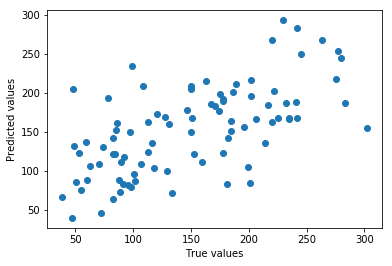

In [23]:
plt.scatter(y_test,predictions)
plt.xlabel("True values")
plt.ylabel("Predicted values")

In [24]:
print("score", model.score(X_test,y_test))

score 0.35512149561349526


In [ ]:
accuracy = metrics.r2_score(y, predictions)
print ("Predicted Accuracy:", accuracy)
# print ("Cross-Predicted Accuracy:", accuracy)

In [26]:
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn import metrics

In [ ]:
# y

In [28]:
# Perform 6-fold cross validation
scores = cross_val_score(model, df, y, cv=6)
print ("Cross-validated scores:", scores)

Cross-validated scores: [0.4554861  0.46138572 0.40094084 0.55220736 0.43942775 0.56923406]


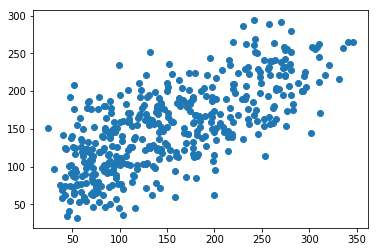

In [29]:
# Make cross validated predictions
predictions = cross_val_predict(model, df, y, cv=6)
plt.scatter(y, predictions)

In [30]:
accuracy = metrics.r2_score(y, predictions)
print ("Cross-Predicted Accuracy:", accuracy)
print ("Cross-Predicted Accuracy:", accuracy)

Cross-Predicted Accuracy: 0.4908065838640775
Cross-Predicted Accuracy: 0.4908065838640775


In [31]:
predictions = lm.predict(X_test)
accuracy = metrics.r2_score(y, predictions)

ValueError: Found input variables with inconsistent numbers of samples: [442, 89]

In [ ]:
from sklearn.model_selection import cross_val_score

crossvalidation = KFold(n=X.shape[0], n_folds=10,shuffle=True, random_state=1)

In [96]:
X=iris.data
y=iris.target
 
#let take k-NN first with k=4
from sklearn.neighbors import KNeighborsClassifier
k_range=range(1,40)
#define a list
k_results=[]
for k in k_range:
    knn=KNeighborsClassifier(n_neighbors=k)
    #K-Fold Cross Valdation
    from sklearn.model_selection import cross_val_score
    #define an object named 'results' tostore the accuracy scores
    #no. of iterations=10
    results=cross_val_score(knn,X,y,cv=10,scoring='accuracy')
    #print(results)
    #store the mean value kor k=1 to 40 ina list
    k_results.append(results.mean())
#print all mean values for k=1 to 40 
print(k_results)

[0.96, 0.9533333333333334, 0.9666666666666666, 0.9666666666666666, 0.9666666666666668, 0.9666666666666668, 0.9666666666666668, 0.9666666666666668, 0.9733333333333334, 0.9666666666666668, 0.9666666666666668, 0.9733333333333334, 0.9800000000000001, 0.9733333333333334, 0.9733333333333334, 0.9733333333333334, 0.9733333333333334, 0.9800000000000001, 0.9733333333333334, 0.9800000000000001, 0.9666666666666666, 0.9666666666666666, 0.9733333333333334, 0.96, 0.9666666666666666, 0.96, 0.9666666666666666, 0.9533333333333334, 0.9533333333333334, 0.9533333333333334, 0.9466666666666667, 0.9466666666666667, 0.9466666666666667, 0.9466666666666667, 0.9466666666666667, 0.9466666666666667, 0.9466666666666667, 0.9466666666666667, 0.9533333333333334]


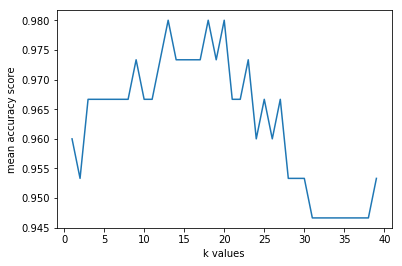

In [97]:
#to plot a graph k_range v/s k_results using matplot.lib.pyplot
import matplotlib.pyplot as plt
plt.plot(k_range,k_results)
plt.xlabel('k values')
plt.ylabel('mean accuracy score')
plt.show()

https://www.ritchieng.com/machine-learning-cross-validation/

https://towardsdatascience.com/train-test-split-and-cross-validation-in-python-80b61beca4b6
